In [1]:
#Importing necessary libaries

from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd
from keplergl import KeplerGl 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#importing the dataset

df = pd.read_csv('Indian_earthquake_data.csv')
df.head()

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India"
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India"
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India"
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana"
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan"


In [3]:
#preprocessing dataset

df['Origin Time'] = pd.to_datetime(df['Origin Time'])
df['Place'] = df.apply(lambda x: x['Location'].split(',')[1], axis=1)
df.head()

C:\Users\vishw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,Origin Time,Latitude,Longitude,Depth,Magnitude,Location,Place
0,2021-07-31 09:43:23,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India",India
1,2021-07-30 23:04:57,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",Maharashtra
2,2021-07-30 21:31:10,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",Punjab
3,2021-07-30 13:56:31,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana",Haryana
4,2021-07-30 07:19:38,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan",Bhutan


In [4]:
#Visualizing with Kepler.gl
map_1 = KeplerGl(height=600)
map_1.add_data(data=df, name='Indian Earthquake Visualization')
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Indian Earthquake Visualization': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

array([' A & N island', ' Arunachal Pradesh', ' Assam', ' Bhutan',
       ' Bihar', ' Chandigarh', ' Chhattisgarh', ' Gujarat', ' Haryana',
       ' Himachal Pradesh', ' Jammu & Kashmir', ' Jharkhand',
       ' Karnataka', ' Kerala', ' Laddakh', ' Lakshsdweep Island',
       ' Madhya Pradesh', ' Manipur', ' Meghalaya', ' Mizoram',
       ' Nagaland', ' Odisha', ' Punjab', ' Rajasthan', ' Sikkim',
       ' Tamil Nadu', ' Telangana', ' Tripura', ' Uttar Pradesh',
       ' Uttarakhand '], dtype=object)

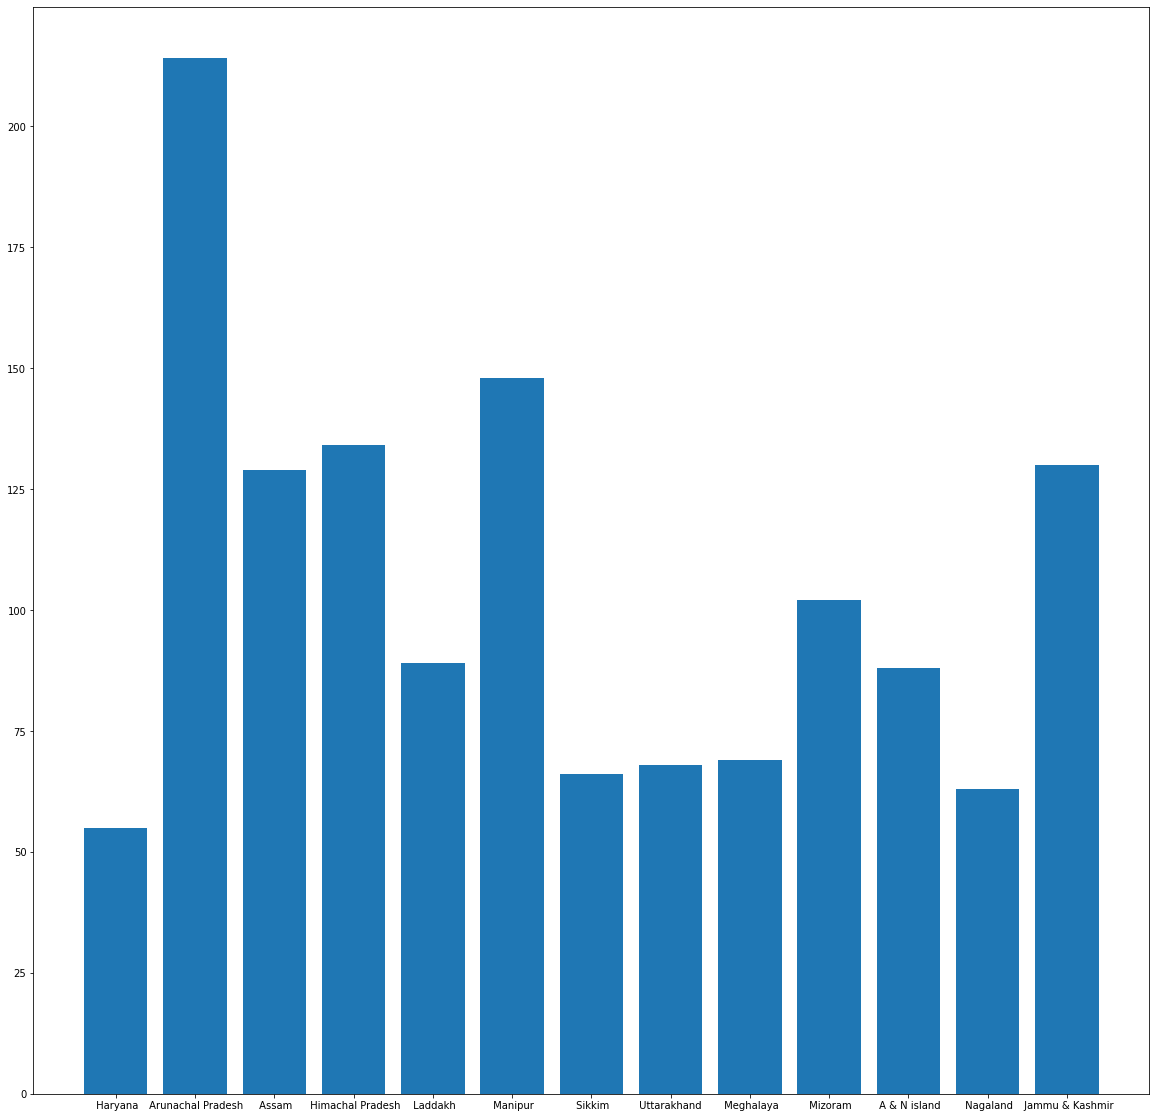

In [5]:
values = []
size = []
indices = []

df.replace(to_replace=" Andaman and Nicobar island", value=" A & N island",inplace=True)
df.replace(to_replace="Maharashtra", value=" Maharashtra",inplace=True)
df.replace(to_replace=" Jammu and Kashmir", value=" Jammu & Kashmir",inplace=True)
df.replace(to_replace="Jammu & Kashmir", value=" Jammu & Kashmir",inplace=True)
df.replace(to_replace=" Uttarakhand", value=" Uttarakhand ",inplace=True)
df.replace(to_replace="Mizoram", value=" Mizoram",inplace=True)




df=df.query("Place != [' India',' Malaysia',' Sri Lanka', ' Afghanistan',' Bangladesh',' Myanmar',' Uzbekistan','Myanmar',' Tajikistan',' Pakistan',' Nepal',' Mongolia',' Kyrgyzstan',' Oman',' Turkmenistan','West Bengal',' West Bengal']")
df


unique = df["Place"].unique()
unique = np.delete(unique,0)
ulist = unique.tolist()

for _,u in enumerate(unique):
    values.append(df[df['Place'].str.contains(u)])
    if(len(values[_]) > 50):
        size.append(len(values[_]))
    else:
        ulist.remove(u)
    
plt.figure(figsize = (20,20))
plt.bar(ulist,size)
# ulist
unique.sort()
unique

In [6]:
df

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location,Place
1,2021-07-30 23:04:57,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",Maharashtra
2,2021-07-30 21:31:10,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",Punjab
3,2021-07-30 13:56:31,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana",Haryana
4,2021-07-30 07:19:38,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan",Bhutan
6,2021-07-30 03:33:16,27.90,94.20,10.0,3.0,"48km W of Basar, Arunachal Pradesh, India",Arunachal Pradesh
...,...,...,...,...,...,...,...
2712,2019-08-06 01:38:55,26.10,89.90,33.0,3.4,"71km NNW of Tura, Meghalaya, India",Meghalaya
2714,2019-08-04 06:56:19,12.30,94.80,10.0,4.8,"224km ESE of Diglipur, Andaman and Nicobar isl...",A & N island
2715,2019-08-04 05:40:33,24.70,94.30,40.0,4.1,"31km SW of Ukhrul, Manipur, India",Manipur
2717,2019-08-03 01:59:11,24.60,94.20,54.0,3.5,"35km SE of Imphal, Manipur, India",Manipur


In [7]:
f1 = df['Latitude']
f2 = df['Longitude']
X = np.array(list(zip(f2,f1)))

In [8]:
X

array([[72.92, 19.93],
       [74.37, 31.5 ],
       [76.23, 28.34],
       ...,
       [94.3 , 24.7 ],
       [94.2 , 24.6 ],
       [92.9 , 14.5 ]])

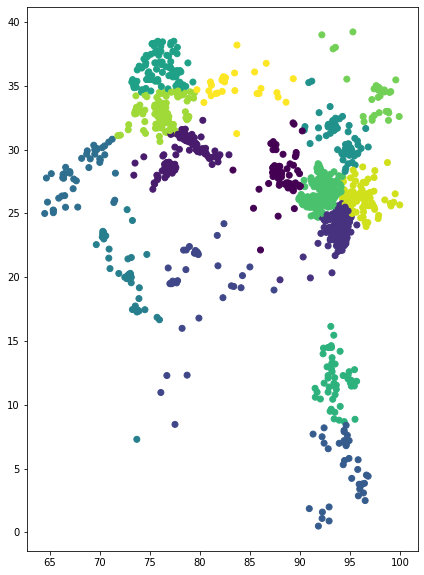

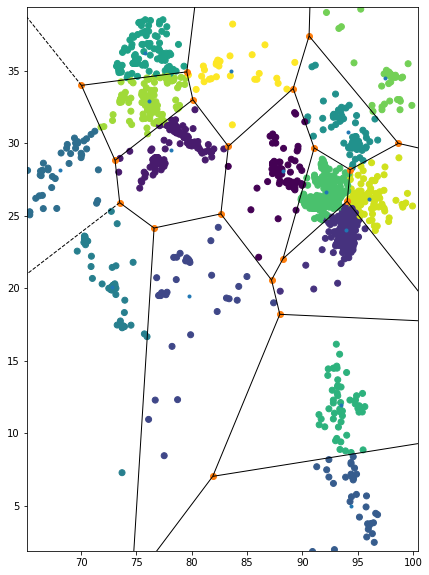

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(15).fit(X)
centers=kmeans.cluster_centers_
labels = kmeans.predict(X)
plt.figure(figsize = (7,10))
plt.scatter(f2,f1,c = labels)
plt.show()

plt.figure(figsize = (7,10))
plt.scatter(f2,f1,c = labels)
vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca())


plt.show()

In [10]:
# plt.scatter(f2,f1)

In [11]:
# plt.scatter([1,1,1,1],[1,2,3,4],c=[1,2,3,4])

In [12]:
df['color'] = labels
# df.sort_values("color")


df = df.sort_values("color")

# df

In [13]:
# df.iloc[0][4]

In [14]:
list = []
freq = [] 
sum = 0
count = 0
for i in range(1,len(df['color'])):
    if(df.iloc[i][7] == df.iloc[i-1][7]):
#         sum += df.iloc[i][4]
        count += 1
    else:
#         sum += df.iloc[i][4]
        count += 1
#         list.append(sum/count)
        freq.append(count)
        sum = 0
        count = 0

In [15]:
freq

[33, 146, 236, 39, 96, 45, 77, 30, 49, 98, 8, 138, 223, 276]

<BarContainer object of 14 artists>

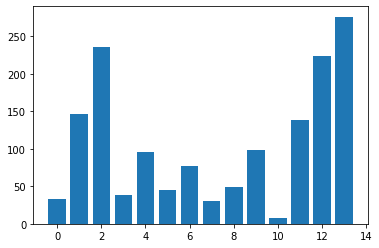

In [16]:
plt.bar(range(len(freq)),freq)